<a href="https://colab.research.google.com/github/pavankumarpammi/projects/blob/main/project_linear_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1.taking data
# Aim is to Predict the Customer Churn for ABC Bank.
# age ,tenure,salary,products_number,active_member as input 
# churn is as output
import pandas as pd
df=pd.read_csv('/content/Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df['credit_card'].value_counts()


1    7055
0    2945
Name: credit_card, dtype: int64

In [5]:
df.groupby('country').size()


country
France     5014
Germany    2509
Spain      2477
dtype: int64

In [6]:
df.groupby('active_member').size()

active_member
0    4849
1    5151
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


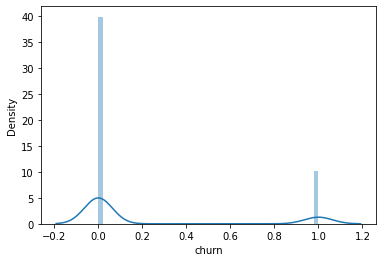

In [7]:
import seaborn as sns
sns.distplot(df['churn'])

In [8]:
df_num=df.select_dtypes(include=['float64','int64'])
df_num

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df_num= df_num.drop(['balance','customer_id'],axis=1) #axis 1 indicates that column and 0 indicates row
df_num

,credit_score,age,tenure,products_number,credit_card,active_member,estimated_salary,churn
0,619,42,2,1,1,1,101348.88,1
1,608,41,1,1,0,1,112542.58,0
2,502,42,8,3,1,0,113931.57,1
3,699,39,1,2,0,0,93826.63,0
4,850,43,2,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...
9995,771,39,5,2,1,0,96270.64,0
9996,516,35,10,1,1,1,101699.77,0
9997,709,36,7,1,0,1,42085.58,1
9998,772,42,3,2,1,0,92888.52,1


In [37]:
x=df_num.iloc[:,0:6].values
x

array([[619,  42,   2,   1,   1,   1],
       [608,  41,   1,   1,   0,   1],
       [502,  42,   8,   3,   1,   0],
       ...,
       [709,  36,   7,   1,   0,   1],
       [772,  42,   3,   2,   1,   0],
       [792,  28,   4,   1,   1,   0]])

In [26]:
y=df_num.iloc[:,7].values
y

array([1, 0, 1, ..., 1, 1, 0])

In [12]:
# 5. TRAIN AND TEST VARBILES
# sklearn.model_selection-pacakage, train_test_split  - libary
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test= train_test_split(x,y,random_state=0)
# training data gets 75 % and testing data can be 25%

In [27]:
print(x.shape) 
print(x_train.shape) 
print(x_test.shape)

(10000, 7)
(7500, 6)
(2500, 6)


In [28]:
print(y.shape)
print(y_train.shape)
print(y_test.shape) 

(10000,)
(7500,)
(2500,)


In [15]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# x_train= scaler.fit_transform(x_train)
# x_test = scaler.fit_transform(x_test)

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [30]:
model.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred= model.predict(x_test)
y_pred

array([0.10376437, 0.33356657, 0.16958809, ..., 0.28834422, 0.23725501,
       0.20373303])

In [33]:
y_test


array([0, 1, 0, ..., 0, 0, 0])

In [34]:
model.predict([[619,42,2,1,1,0]])

array([0.34451971])

In [21]:
print(x_train[10])

[710  21   4   2   1   1]


In [22]:
print(y_train[10])

0


In [35]:
model.predict([[608,41,1,1,0,1]])

array([0.20322506])

In [36]:
model.predict([[516,35,10,1,1,1]])

array([0.10466763])